# Họ và tên: Bùi Hoàng Linh
# MSV: 2022602573
# Lớp:

In [4]:
# cài đặt các thư viện cần thiết
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") # loại bỏ các cảnh báo
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report 

In [5]:
# Khai báo các giá trị tham số
path_file    = 'Hill_valley.csv'
random_state = 42   # dùng trong chia dữ liệu
test_size    = 0.25 # dùng trong chia dữ liệu
k_fold       = 10   # dùng trong đánh giá kiểm định chéo
CV           = 5    # dùng trong quá trình tìm kiếm tham số tốt nhất
DPI          = 200  # độ phân giải cho biểu đồ

In [6]:
# đọc dữ liệu sử dụng pandas
try:
    # đọc file csv
    df = pd.read_csv(path_file, header = 0, 
                     sep = ',',
                     skipinitialspace = True)
    print('Đọc file thành công !')
    print(df.head(5))
except FileNotFoundError:
    print(f"Lỗi : File '{path_file}' không tồn tại")

Đọc file thành công !
          0         1         2         3         4         5         6  \
0     39.02     36.49     38.20     38.85     39.38     39.74     37.02   
1      1.83      1.71      1.77      1.77      1.68      1.78      1.80   
2  68177.69  66138.42  72981.88  74304.33  67549.66  69367.34  69169.41   
3  44889.06  39191.86  40728.46  38576.36  45876.06  47034.00  46611.43   
4      5.70      5.40      5.28      5.38      5.27      5.61      6.00   

          7         8         9  ...        91        92        93        94  \
0     39.53     38.81     38.79  ...     36.62     36.92     38.80     38.52   
1      1.70      1.75      1.78  ...      1.80      1.79      1.77      1.74   
2  73268.61  74465.84  72503.37  ...  73438.88  71053.35  71112.62  74916.48   
3  37668.32  40980.89  38466.15  ...  42625.67  40684.20  46960.73  44546.80   
4      5.38      5.34      5.87  ...      5.17      5.67      5.60      5.94   

         95        96        97        98     

In [7]:
# kiểm tra thông tin dữ liệu
# kiểm tra dữ liệu có thiếu hay không
check_nan = df.isna().any().any()
if check_nan:
    print('Dữ liệu bị thiếu !')
else:
    print('Dữ liệu đầy đủ')

Dữ liệu đầy đủ


100
0    606
1    606
Name: count, dtype: int64


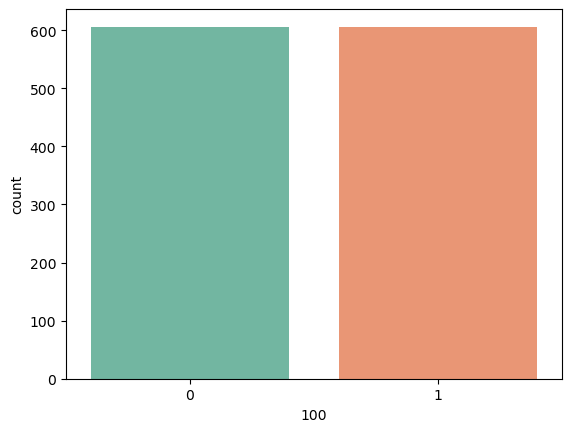

In [8]:
# kiểm tra tính cân bằng của nhãn
print(df['100'].value_counts())
sns.countplot(data = df, x = '100', palette = 'Set2');

In [9]:
# tiền xử lý dữ liệu


# Chuyển đổi các thuộc tính dạng ký tự sang số
Le = LabelEncoder()
df['100'] = Le.fit_transform(df['100'])

# chuẩn hoá dữ liệu min-max
# lấy dữ liệu chuẩn hoá từ dataframe
df_X = df.iloc[:,:-1]
df_y = df.iloc[:, -1]

# Chuẩn hoá dữ liệu
scaler = MinMaxScaler()
df_X = scaler.fit_transform(df_X)

In [10]:
# Chuẩn bị dữ liệu huấn luyện

# đánh giá theo phương pháp chia tỷ lệ
X_train, X_test, y_train, y_test = train_test_split(df_X,df_y,
                                                 test_size = test_size,
                                                 random_state= random_state)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((909, 100), (303, 100), (909,), (303,))

In [11]:
# Khởi tạo và huấn luyện mô hình 

# Khởi tạo mô hình
clf = SVC()
start = time.time()
clf.fit(X_train, y_train) # Huấn luyện mô hình
execution_time = time.time() - start
print(f'Thời gian huấn luyện mô hình: {execution_time}')

# dự đoán mô hình
y_pred = clf.predict(X_test)

# đánh giá mô hình
accuracy = accuracy_score(y_test,y_pred)
print(f"Độ chính xác của mô hình: {accuracy}")

Thời gian huấn luyện mô hình: 0.11516737937927246
Độ chính xác của mô hình: 0.49834983498349833


In [16]:
# sử dụng GridSearchSV để tìm kiếm một bộ tham số cho mô hình
# Khởi tạo Lưới tham số
parameters = {
    'kernel': ['linear','rbf','poly','sigmoid'], # các dạng hàm kernel
    'C'     : [0, 0.1, 1, 10, 100],              # Tham số phạt của mô hình
    'coef0' : [1, 2, 3, 4],                      # Tham số gamma của đa thức
    'degree': [1, 2, 3, 4]                       # Bậc của đa thức
}

# tìm kiếm tham số 
gridsearch = GridSearchCV( estimator= clf, 
                          param_grid = parameters, 
                          scoring = 'accuracy', 
                          cv = CV,
                          verbose = 2,
                          refit = True)
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] END ..............C=0, coef0=1, degree=1, kernel=linear; total time=   0.0s
[CV] END ..............C=0, coef0=1, degree=1, kernel=linear; total time=   0.0s
[CV] END ..............C=0, coef0=1, degree=1, kernel=linear; total time=   0.0s
[CV] END ..............C=0, coef0=1, degree=1, kernel=linear; total time=   0.0s
[CV] END ..............C=0, coef0=1, degree=1, kernel=linear; total time=   0.0s
[CV] END .................C=0, coef0=1, degree=1, kernel=rbf; total time=   0.0s
[CV] END .................C=0, coef0=1, degree=1, kernel=rbf; total time=   0.0s
[CV] END .................C=0, coef0=1, degree=1, kernel=rbf; total time=   0.0s
[CV] END .................C=0, coef0=1, degree=1, kernel=rbf; total time=   0.0s
[CV] END .................C=0, coef0=1, degree=1, kernel=rbf; total time=   0.0s
[CV] END ................C=0, coef0=1, degree=1, kernel=poly; total time=   0.0s
[CV] END ................C=0, coef0=1, degree

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 0.1, 1, 10, 100], 'coef0': [1, 2, 3, 4],
                         'degree': [1, 2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [20]:
# đưa ra tham số tốt nhất và độ chính xác cao nhất khi GridSearchSV
# in ra bộ tham số tốt nhất
best_params = gridsearch.best_params_
print(f'Bộ tham số tốt nhất của mô hình: {best_params}')
# in ra bộ chính xác cao nhất của mô hình
print(f'Độ chính xác cao nhất của mô hình: {gridsearch.best_score_}')

Bộ tham số tốt nhất của mô hình: {'C': 100, 'coef0': 4, 'degree': 4, 'kernel': 'poly'}
Độ chính xác cao nhất của mô hình: 0.6963572339262947


Thời gian huấn luyện : 0.22098326683044434
              precision    recall  f1-score   support

           0       0.61      0.95      0.74       142
           1       0.91      0.47      0.62       161

    accuracy                           0.69       303
   macro avg       0.76      0.71      0.68       303
weighted avg       0.77      0.69      0.68       303



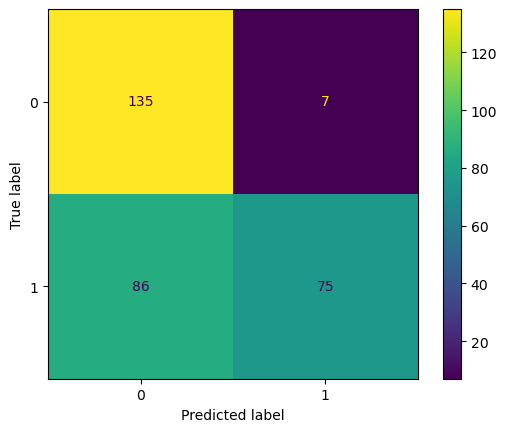

In [22]:
# đánh giá lại mô hình
# Khởi tạo lại mô hình với bộ tham số tìm được

clf = SVC(**best_params)
start = time.time()
clf.fit(X_train, y_train)
finish = time.time() - start
print(f'Thời gian huấn luyện : {finish}')

# đánh giá mô hình
y_pred =  clf.predict(X_test)
# đưa ra báo cáo đánh giá
print(classification_report(y_test,y_pred))
report = classification_report(y_test,y_pred, output_dict = True)

# in ra ma trận confusion
ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test)

In [23]:
"""
Cách 1: Sử dụng các tính bình thường theo công thức
- Quy ước: 0 - positive
           1 - negative
"""
# True positive 
TP = np.sum((y_test == 0) & (y_pred == 0))
# False positive 
FP = np.sum((y_test == 1) & (y_pred == 0))
# False Negative
FN = np.sum((y_test == 0) & (y_pred == 1))
# True Negative
TN = np.sum((y_test == 1 ) & (y_pred == 1))

print("{:<15}:  {:>5}".format("True positive",TP))
print("{:<15}:  {:>5}".format("False positive",FP))
print("{:<15}:  {:>5}".format("True Negative",TN))
print("{:<15}:  {:>5}".format("False Negative",FN))

# tính các giá trị Precision, recall, f1 - score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1score = 2 * (precision * recall) / (precision + recall)
print("{:<15}:  {:>5.4}".format("Precision",precision))
print("{:<15}:  {:>5.4}".format("recall",recall))
print("{:<15}:  {:>5.4}".format("F1 - score",f1score))

True positive  :    135
False positive :     86
True Negative  :     75
False Negative :      7
Precision      :  0.6109
recall         :  0.9507
F1 - score     :  0.7438


In [24]:
"""
Cách 2: Sử dụng thư viện truy xuất tới các giá trị của report
"""

# kiểm tra các địa chỉ truy cập của report
print(report.keys())

# truy cập tới các giá trị
precision = report['0']['precision']
recall = report['0']['recall']
f1score = report['0']['f1-score']
accuracy = report['accuracy']
print("{:<15}:  {:>5.4}".format("Precision",precision))
print("{:<15}:  {:>5.4}".format("recall",recall))
print("{:<15}:  {:>5.4}".format("F1 - score",f1score))
print("{:<15}:  {:>5.4}".format("Accuracy",accuracy))

dict_keys(['0', '1', 'accuracy', 'macro avg', 'weighted avg'])
Precision      :  0.6109
recall         :  0.9507
F1 - score     :  0.7438
Accuracy       :  0.6931


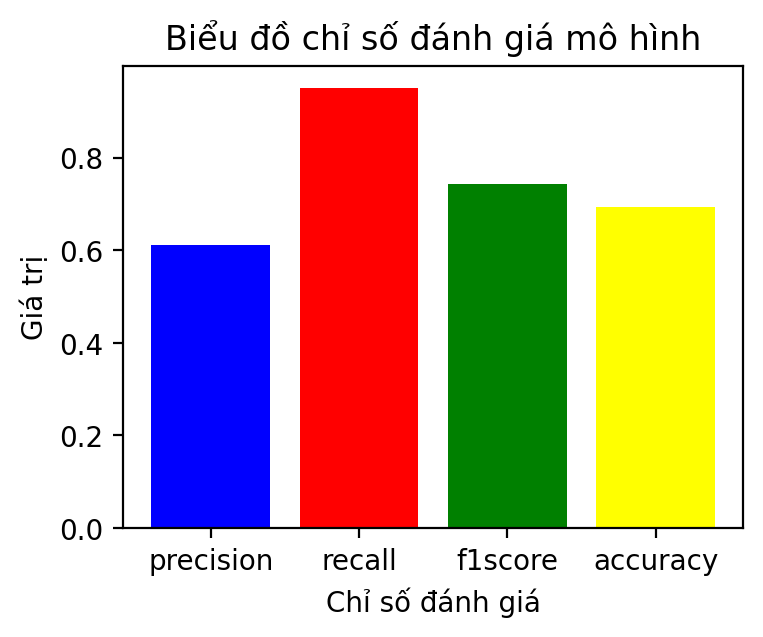

In [25]:
# biểu diễn các giá trị đánh giá trên đồ thị
labels = ['precision','recall','f1score','accuracy']
values = [precision, recall, f1score, accuracy]
# gán màu cho từng cột
colors = ['blue','red','green','yellow']

# tạo figure với độ phân giải cao, tham số dpi
plt.figure(figsize = (4,3), dpi = DPI)

# vẽ biểu đồ cột 
plt.bar(labels,values,color = colors)

# thêm tiêu đề cho biểu đồ
plt.title("Biểu đồ chỉ số đánh giá mô hình")
plt.xlabel("Chỉ số đánh giá")
plt.ylabel('Giá trị')
# plt.grid()
plt.show()

In [26]:
# đánh giá mô hình theo phương pháp kiểm định chéo
# khởi tạo hàm kiểm định chéo
kf = KFold(n_splits = k_fold , shuffle = True, random_state = random_state)

accuracies = []
precisions = []
recalls    = []
f1_scores  = []

i = 1
for train_index, test_index in  kf.split(df_X):
    start = time.time()
    # Chia dữ liệu thành training và testing
    X_train, X_test = df_X[train_index],df_X[test_index]
    y_train, y_test = df_y[train_index],df_y[test_index]

    print( X_train.shape)
    print( X_test.shape)

    #khưởi tạo mô hình
    clf = SVC(**best_params)

    #huấn luyện mô hình 
    clf.fit(X_train,y_train)

    finish = time.time() - start
    # dự đoán mô hình
    y_pred = clf.predict(X_test)
    # đưa ra độ chính xác mô hình
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1score = f1_score(y_test,y_pred)

    #in ra kết quả
    print('Fold: ',i)
    print("{:<15}:  {:>5.4}".format("Accuracy",accuracy))
    print("{:<15}:  {:>5.4}".format("Precision",precision))
    print("{:<15}:  {:>5.4}".format("Recall",recall))
    print("{:<15}:  {:>5.4}".format("F1 - score",f1score))
    print("##################################################")
    # append vào các mảng
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1score)
    i = i+1

(1090, 100)
(122, 100)
Fold:  1
Accuracy       :  0.6721
Precision      :  0.9667
Recall         :  0.4265
F1 - score     :  0.5918
##################################################
(1090, 100)
(122, 100)
Fold:  2
Accuracy       :  0.7049
Precision      :  0.8947
Recall         :  0.5152
F1 - score     :  0.6538
##################################################
(1091, 100)
(121, 100)
Fold:  3
Accuracy       :  0.7438
Precision      :    0.9
Recall         :  0.4909
F1 - score     :  0.6353
##################################################
(1091, 100)
(121, 100)
Fold:  4
Accuracy       :  0.6694
Precision      :  0.8621
Recall         :  0.4098
F1 - score     :  0.5556
##################################################
(1091, 100)
(121, 100)
Fold:  5
Accuracy       :  0.6942
Precision      :  0.9677
Recall         :  0.4545
F1 - score     :  0.6186
##################################################
(1091, 100)
(121, 100)
Fold:  6
Accuracy       :  0.7273
Precision      :  0.9688
Reca

In [40]:
# Tính các giá trị trung bình
mean_accuracy  = np.mean(accuracies)
std_acc        = np.std(accuracies)

mean_precision = np.mean(precisions)
std_pre        = np.std(precisions)

mean_recall    = np.mean(recalls)
std_rec        = np.std(recalls)

mean_f1_score  = np.mean(f1_scores)
std_f1         = np.std(f1_scores)

# in ra các giá trị trung bình
print("{:<15}:  {:>5.4}".format("Mean accuracy",mean_accuracy))
print("{:<15}:  {:>5.4}".format("Standard accuracy",std_acc))
print("{:<15}:  {:>5.4}".format("Mean precision",mean_precision))
print("{:<15}:  {:>5.4}".format("Standard precision",std_pre))
print("{:<15}:  {:>5.4}".format("Mean recall",mean_recall))
print("{:<15}:  {:>5.4}".format("Standard recall",std_rec))
print("{:<15}:  {:>5.4}".format("Mean f1-score",mean_f1_score))
print("{:<15}:  {:>5.4}".format("Standard f1-score",std_f1))

Mean accuracy  :  0.7088
Standard accuracy:  0.03435
Mean precision :  0.9376
Standard precision:  0.04072
Mean recall    :  0.4481
Standard recall:  0.03724
Mean f1-score  :  0.6051
Standard f1-score:  0.03365
